# HW2 NYC restaurants, Setup

In [407]:
from pandas import Series, DataFrame
import pandas as pd
df = pd.read_csv('NYC_Restaurants (1).csv', dtype=unicode)
df_copy = df.copy()
#df[:20]

# Q1 - create a unique name for each restaurant

In [408]:
df_copy["RESTAURANT"] = df["DBA"] + " " + df["BUILDING"].map(str) + " " + df["STREET"] + " " + df["ZIPCODE"].map(str) + " " + df["BORO"]
df_copy["RESTAURANT"][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# Q2 - How many restaurants are included in the data?

In [409]:
num_rest = len(df_copy["RESTAURANT"].unique())
print "number of restaurants =", num_rest

number of restaurants = 10114


# Q3 -  How many chains are there?

In [412]:
s_rest = (df_copy[["RESTAURANT", "DBA"]].drop_duplicates())["DBA"].value_counts() #series of value counts of each restaurant by name
mask = s_rest > 1 #masks restaurants if value count is greater than 1
num_unique_chains = len(s_rest[mask])
print "number of chains =", num_unique_chains
#num_chains = s_rest[mask].sum()
#print "number of DBA's =", len(s_rest)
#print "number of chain restuarants =", s_rest[mask].sum()

number of chains = 368


# Q4 - Plot a bar graph of the top 20 most popular chains

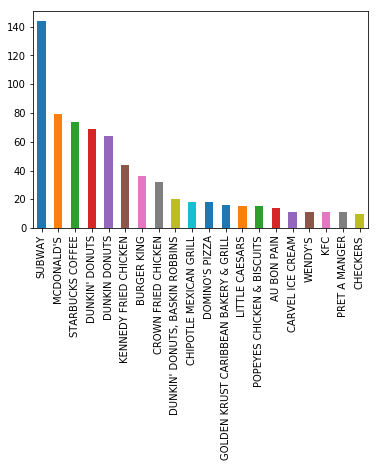

In [281]:
s_rest[:20].plot(kind = "bar")

# Q5 - What fraction of all restaurants are chain restaurants?

In [413]:
#num_chains = s_rest[mask].sum()
#num_rest = len(df_copy["RESTAURANT"].unique())
frac_chains = num_chains * 1.0 / num_rest
frac_chains

0.16472216729286138

# Q6 - Plot the number of non-chain restaurants in each boro.

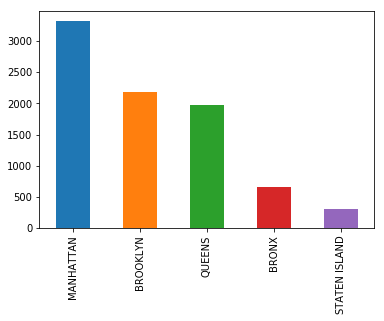

In [417]:
not_chains = s_rest[s_rest == 1].keys() #gets a list of all restaurants that are not chains

not_chain_by_boro = pd.DataFrame(data = not_chains, columns = ['DBA']).merge(df_copy, on = ["DBA"])\
                                                                    .drop_duplicates(subset = "DBA")["BORO"]\
                                                                    .value_counts()\
                                                                    .drop(labels = "Missing")
                                                                        
#created by merging the not chain restaurants df with original df, dropping duplicates, and value counting rows 
not_chain_by_boro.plot(kind = "bar")

# Q7 - Plot the fraction of non-chain restaurants in each boro.

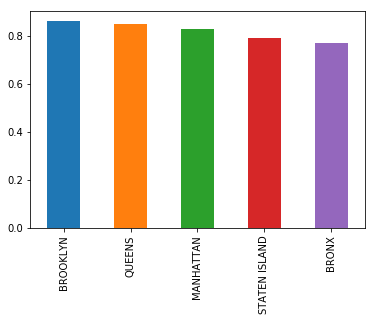

In [282]:
num_unique_rest = df_copy.drop_duplicates(subset = "RESTAURANT") #df of unique restaurants

rest_by_boro = num_unique_rest["BORO"].value_counts().drop(labels = "Missing")

frac_non_chain_boro = not_chain_by_boro * 1.0 / rest_by_boro
frac_non_chain_boro.sort_values(ascending = False).plot(kind = "bar")

# Q8 - Plot the popularity of cuisines.

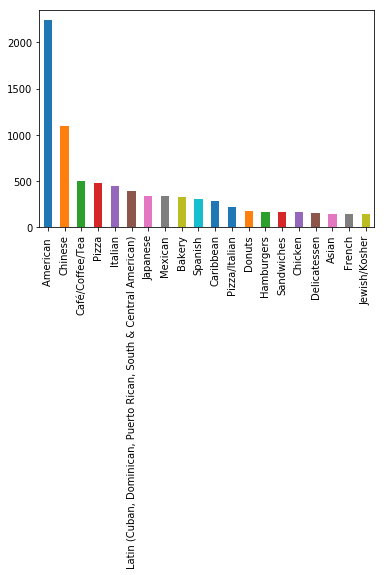

In [418]:
pop_cuisines = num_unique_rest["CUISINE DESCRIPTION"].value_counts()
pop_cuisines[:20].plot(kind = "bar")

# Q9 - Plot the cuisines among restaurants which never got cited for violations.

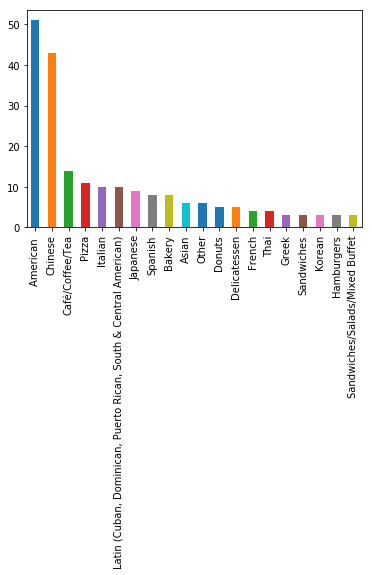

In [475]:
rest_yes_viol = df_copy[df_copy["VIOLATION CODE"].notnull()]["RESTAURANT"].unique() #numpy array, basically a list, of the restaurants with violations

def not_viol(rest):
    return rest not in rest_yes_viol

cuisine_no_viol = df_copy[df_copy["RESTAURANT"].map(not_viol)]["CUISINE DESCRIPTION"].value_counts() #series of restaurants that never had a violation
#function being mapped takes every restaurant and checks if its in the list of restaurants that have had a violation and only returns if the restaurant not in the list

cuisine_no_viol[:20].plot(kind = "bar")

# Q10 - What cuisines tend to be the “cleanest”?

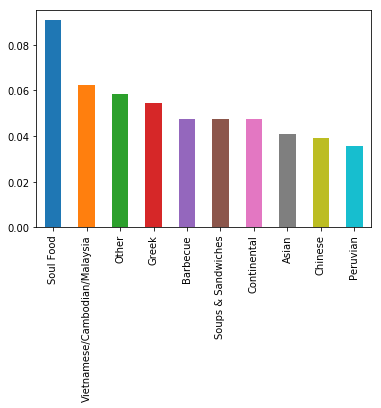

In [450]:
mask_pop_cuisine = num_unique_rest["CUISINE DESCRIPTION"].value_counts() > 19 #gets the most popular cuisines 
ratio = cuisine_no_viol * 1.0 / pop_cuisines[mask_pop_cuisine] #ratio of restaurant cuisine with no violation / total number of popular cuisines  

ratio.dropna().sort_values(ascending = False)[:10].plot(kind = "bar")

# Q11 - What are the most common violations in each borough?

In [477]:
com_viol_t = pd.crosstab(df_copy["VIOLATION DESCRIPTION"].dropna(), df_copy["BORO"].dropna())
print "most common violation description by", com_viol_t.idxmax()
com_viol_t = pd.crosstab(df_copy["VIOLATION CODE"].dropna(), df_copy["BORO"].dropna())
print "most common violation code by",com_viol_t.idxmax()

most common violation description by BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object
most common violation code by BORO
BRONX            10F
BROOKLYN         10F
MANHATTAN        10F
QUEENS           10F
STATEN ISLAND    10F
dtype: object


# Q12 - What are the most common violations per borough, after normalizing for the relative abundance of each violation?

In [479]:
import numpy as np
df_copy["BORO"] = df_copy["BORO"].replace("Missing", np.nan) #replaces the missing rows with NaN

crosstab = pd.crosstab(df_copy["VIOLATION DESCRIPTION"], df_copy["BORO"].dropna()) 

viol_freq_s = df_copy["VIOLATION DESCRIPTION"].value_counts()

crosstab_norm_t = crosstab.T / viol_freq_s #normalized crosstab

print crosstab_norm_t.T.idxmax()

crosstab = pd.crosstab(df_copy["VIOLATION CODE"], df_copy["BORO"].dropna())

viol_freq_s = df_copy["VIOLATION CODE"].value_counts()

crosstab_norm_t = crosstab.T / viol_freq_s

print crosstab_norm_t.T.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object
BORO
BRONX            04I
BROOKLYN         02D
MANHATTAN        03E
QUEENS           03G
STATEN ISLAND    03C
dtype: object


# Q13 -  How many phone area codes correspond to a single zipcode?

In [482]:
num_unique_rest["AREA_CODE"] = num_unique_rest["PHONE"].str[:3] 
area_zip_t = pd.crosstab(num_unique_rest["ZIPCODE"], num_unique_rest["AREA_CODE"])
area_zip_t

mask_row = (area_zip_t.sum(axis = 0) == area_zip_t.max())
one_area_zip = area_zip_t.T[mask_row]

area_names = one_area_zip.T.columns.values
area_list = list(area_names)
print "number of phone area codes that corresond to a single zipcode:",len(area_list)
one_area_zip.T.idxmax()

number of phone area codes that corresond to a single zipcode: 34


C:\Users\tsblo\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


AREA_CODE
000    10469
171    11226
175    10454
191    10011
202    11430
206    10004
281    11226
303    10018
305    10002
404    10028
410    10018
412    10454
434    10010
502    11238
505    10009
570    11221
605    10032
607    11206
610    11372
612    11222
615    11215
617    11221
626    10002
702    11217
716    10458
728    11220
855    10461
860    10022
905    10465
908    10002
954    11372
964    10306
970    10012
985    10014
dtype: object

# Q14 - Find common misspellings of street names

In [483]:
#Create a new column, called STREET TYPE
df_copy["STREET TYPE"] = df_copy["STREET"].str.split().str[-1] 

#Create another column, called STREET BASE
df_copy["STREET BASE"] = df_copy["STREET"].str.split().str[:-1]

def join(L):
    string = " ".join(L)
    return string

df_copy["STREET BASE"] = df_copy["STREET BASE"].apply(join) #creates a string of the street base instead of a list

#Create a third column, called STREET BASE & ZIP
df_copy["STREET BASE & ZIP"] = df_copy["STREET BASE"] + " " + df_copy["ZIPCODE"]

#Create a table containing just these three columns
df_adress = df_copy[["STREET BASE", "STREET TYPE", "STREET BASE & ZIP"]].dropna() 

#Merge this table with itself, on the STREET BASE & ZIP column
df_adress_merge = df_adress.merge(df_adress, left_on = "STREET BASE & ZIP", right_on = "STREET BASE & ZIP", suffixes = ["_SELF", "_COPY"])

#From the merged table, select only the rows where the street types are different
mask = df_adress_merge["STREET TYPE_SELF"] == df_adress_merge["STREET TYPE_COPY"]
df_duplicates = df_adress_merge[mask == False].drop_duplicates(subset = "STREET BASE_SELF") #this is where we dropped duplicates instead of earlier

#Now, do a cross-tabulation of the two distinct street types
df_dup_cross = pd.crosstab(df_duplicates["STREET TYPE_SELF"], df_duplicates["STREET TYPE_COPY"])

#From this cross-tabulation table, find the most commonly street type 
#that occurs with each of the following: AVE, ST, RD, PL, BOULEARD, and BULEVARD.
print "the most commonly street type that occurs with AVE is ",df_dup_cross["AVE"].idxmax()
print "the most commonly street type that occurs with ST is ",df_dup_cross["ST"].idxmax()
print "the most commonly street type that occurs with RD is ",df_dup_cross["RD"].idxmax()
print "the most commonly street type that occurs with PL is ",df_dup_cross["PL"].idxmax()
print "the most commonly street type that occurs with BOULEARD is ",df_dup_cross["BOULEARD"].idxmax()
print "the most commonly street type that occurs with BULEVARD is ",df_dup_cross["BULEVARD"].idxmax()

the most commonly street type that occurs with AVE is  AVENUE
the most commonly street type that occurs with ST is  STREET
the most commonly street type that occurs with RD is  ROAD
the most commonly street type that occurs with PL is  PLACE
the most commonly street type that occurs with BOULEARD is  BOULEVARD
the most commonly street type that occurs with BULEVARD is  BOULEVARD
